# Regular Genomics Project **RNA Localisation**


In [1]:
from keras.optimizers import Nadam, SGD
from keras.losses import KLDivergence

from plotting import plot_line_graph
from metrics import pearson
from models import CNN
from utils import prepare_data, set_variables

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [7]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'derivativeRNATrack1'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

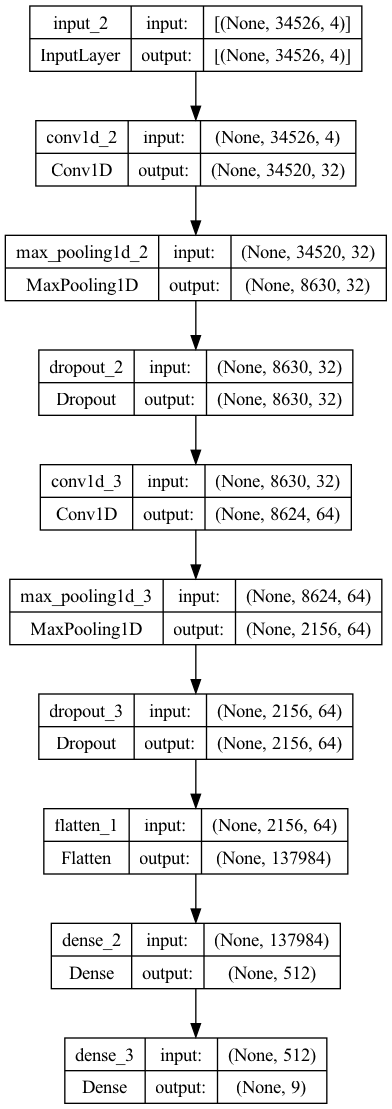

In [8]:
model = CNN(input_size=(max_seq_len, 4),
            params_model=params_model,
            optimizer=SGD(learning_rate=1e-4),
            loss=KLDivergence(),
            metrics=[pearson]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [9]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train)

Epoch 1/120
311/311 [==============================] - 158s 492ms/step - loss: 0.1731 - pearson: 0.1739 - val_loss: 0.1810 - val_pearson: 0.1870
Epoch 2/120
311/311 [==============================] - 151s 475ms/step - loss: 0.1672 - pearson: 0.2167 - val_loss: 0.1836 - val_pearson: 0.1903
Epoch 3/120
311/311 [==============================] - 157s 496ms/step - loss: 0.1655 - pearson: 0.2310 - val_loss: 0.1841 - val_pearson: 0.1833
Epoch 4/120
311/311 [==============================] - 154s 485ms/step - loss: 0.1645 - pearson: 0.2418 - val_loss: 0.1849 - val_pearson: 0.1810
Epoch 5/120
311/311 [==============================] - 150s 471ms/step - loss: 0.1635 - pearson: 0.2545 - val_loss: 0.1846 - val_pearson: 0.1821
Epoch 6/120
311/311 [==============================] - 154s 486ms/step - loss: 0.1624 - pearson: 0.2643 - val_loss: 0.1836 - val_pearson: 0.1779
Epoch 7/120
311/311 [==============================] - 153s 482ms/step - loss: 0.1614 - pearson: 0.2745 - val_loss: 0.1812 - val_p

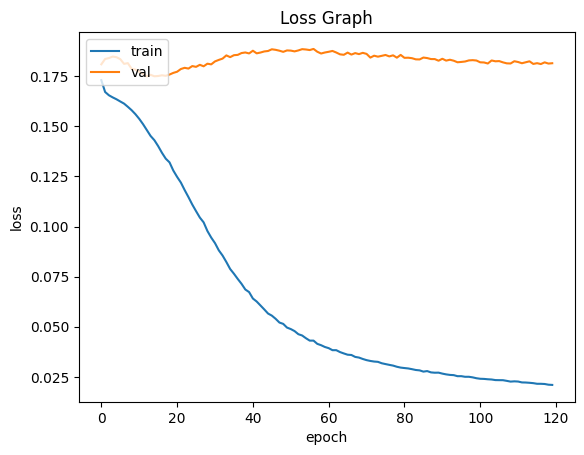

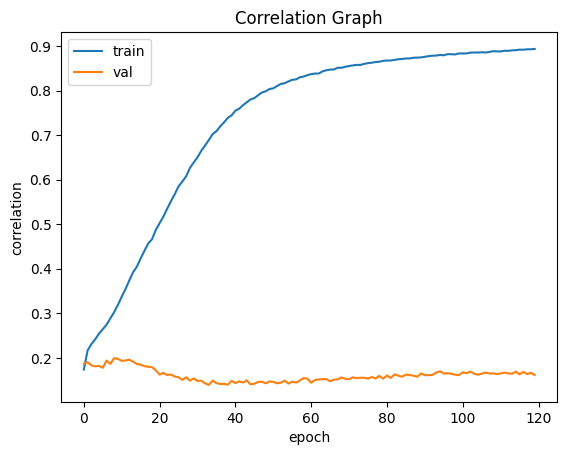

In [10]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

plt_data = [history.history['pearson'], history.history['val_pearson']]
plot_line_graph(plt_data, "Correlation Graph", 'correlation', 'epoch', ['train', 'val'])

In [12]:
model.print_model(model_architecture_path)
model.save_model(model_output_path)

FileNotFoundError: [Errno 2] No such file or directory: 'model_architectures_viz/derivativeRNATrack1_2023-07-03.png'